In [1]:
import numpy as np 
import pandas as pd

In [29]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

## Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
# drops unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# rename columns
df.rename(columns={'v1':'classification', 'v2':'text'}, inplace=True)
df.sample(5)

,classification,text
1097,ham,Don't fret. I'll buy the ovulation test strips...
1245,ham,Hello which the site to download songs its urg...
3844,ham,Mmmm.... I cant wait to lick it!
3385,ham,Oops - am at my mum's in somerset... Bit far! ...
5548,ham,"No, I was trying it all weekend ;V"


In [18]:
from sklearn.preprocessing import LabelEncoder
# !pip install -U scikit-learn
encoder = LabelEncoder()

In [32]:
# converts the ham / spam to 0 and 1
df['classification'] = encoder.fit_transform(df['classification'])

In [22]:
df.head()

,classification,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# check missing values
df.isnull().sum()

classification    0
text              0
dtype: int64

In [24]:
# check duplicates
df.duplicated().sum()

403

In [33]:
# remove duplicates
df.drop_duplicates(inplace=True) 
df.duplicated().sum()

0

In [34]:
df.shape

(5169, 2)

## EDA

In [37]:
df.sample(5)

,classification,text
1068,1,Someone U know has asked our dating service 2 ...
131,0,"Dear, will call Tmorrow.pls accomodate."
2657,0,Dai &lt;#&gt; naal eruku.
1116,0,Hey... What time is your driving on fri? We go...
4727,0,I (Career Tel) have added u as a contact on IN...


In [36]:
# checks number of spam and ham in classification 
df['classification'].value_counts()

classification
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

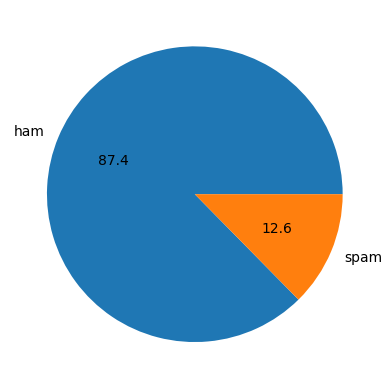

In [48]:
import matplotlib.pyplot as plt
# !pip install matplotlib
plt.pie(df['classification'].value_counts(), labels=['ham', 'spam'], autopct="%.1f")
plt.show
# there is an inbalance in data

In [62]:
import nltk
# !pip install --user -U nltk


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: C:\Users\Ishmam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
nltk.download('punkt') # punkt package is good for text that aren't necessarily english

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishmam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [65]:
# Some functionality of nltk and punkt, can separate the words/sentences in a text
from nltk.tokenize import sent_tokenize, word_tokenize

sentence = "This is an example sentence. Tokenize it!"
sentences = nltk.tokenize.sent_tokenize(sentence)
words = nltk.tokenize.word_tokenize(sentence)

print("Sentences:", sentences)
print("Words:", words)

Sentences: ['This is an example sentence.', 'Tokenize it!']
Words: ['This', 'is', 'an', 'example', 'sentence', '.', 'Tokenize', 'it', '!']


In [67]:
df['num_characters']=df['text'].apply(len) # applies the function "len" in each row

In [68]:
df.head()

,classification,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [70]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [72]:
df.head()

,classification,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [74]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [75]:
df.head()

,classification,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [76]:
# statistics
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
# ham
df[df['classification']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
# spam
df[df['classification']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [79]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

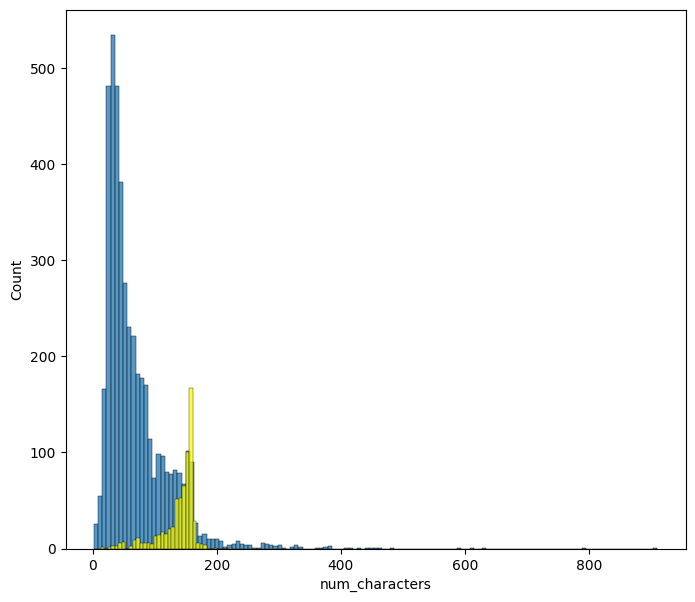

In [91]:
plt.figure(figsize=(8,7))
sns.histplot(df[df['classification']==0]['num_characters'])
sns.histplot(df[df['classification']==1]['num_characters'], color='yellow')

# ham tends to have less characters than spam

<Axes: xlabel='num_words', ylabel='Count'>

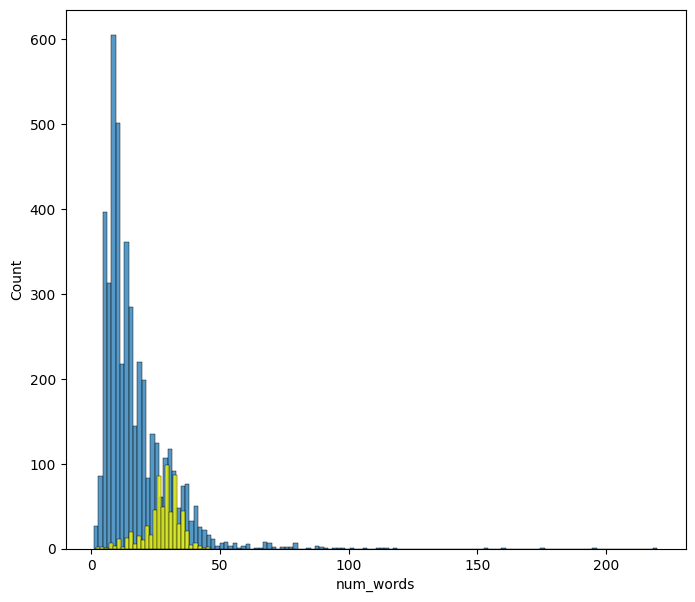

In [92]:
plt.figure(figsize=(8,7))
sns.histplot(df[df['classification']==0]['num_words'])
sns.histplot(df[df['classification']==1]['num_words'], color='yellow')

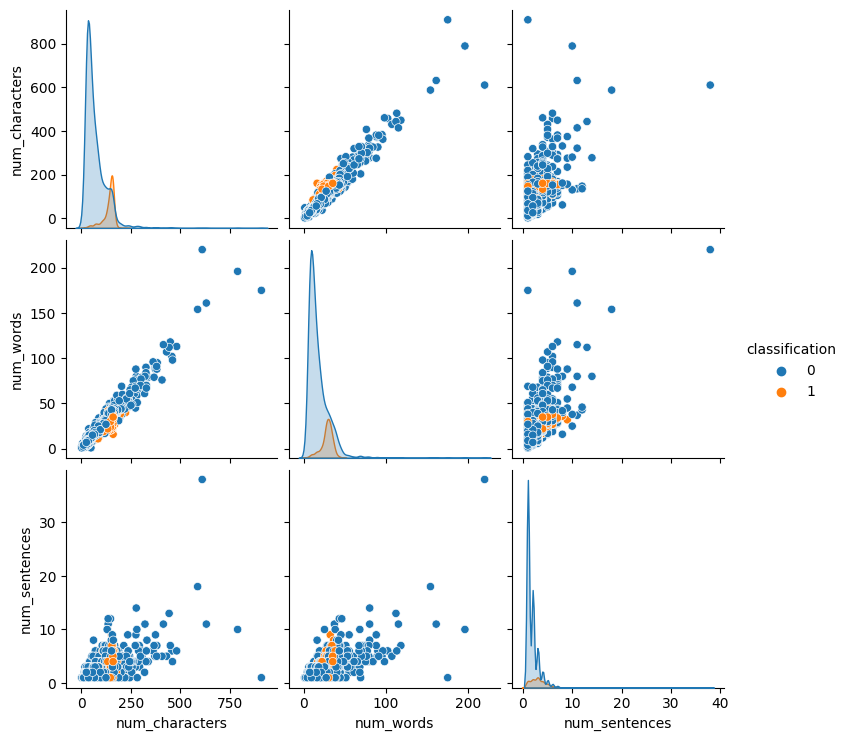

In [93]:
sns.pairplot(df, hue='classification')

<Axes: >

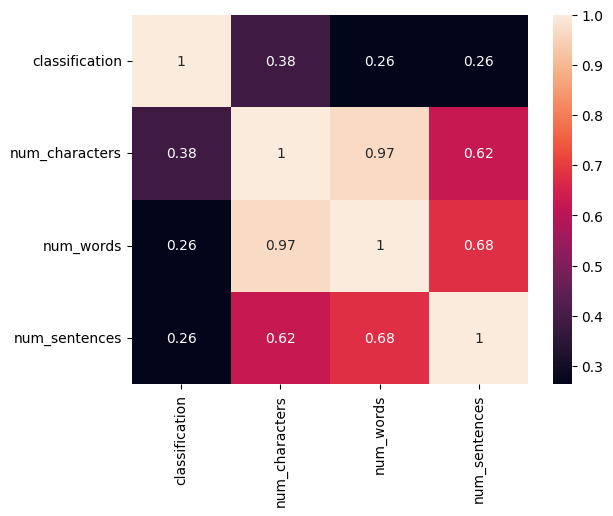

In [99]:
sns.heatmap(df[['classification', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)
# we will be using num_characters because it has high correlation

## Data Preprocessing

In [109]:
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishmam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [112]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [131]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving') # converts words that are the same but in different tenses, into one

'love'

In [132]:
def transform_text(text):
    text = text.lower() # lower case
    text = nltk.word_tokenize(text) # separating words
    
    # removing unnecessary words and punctuation 
    y = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') \
            and i not in string.punctuation:
            y.append(ps.stem(i))

    
    return " ".join(y)

In [136]:
transform_text("Lol now I'm after that hot air balloon!	")

'lol hot air balloon'

In [139]:
df['transformed_text'] = df['text'].apply(transform_text)

In [140]:
df.head()

,classification,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [142]:
# !pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [143]:
spam_text = wc.generate(df[df['classification']==1]['transformed_text'].str.cat(sep=" "))
# since wordcloud.generate accepts only 1 string , we have to concatinate all the texts

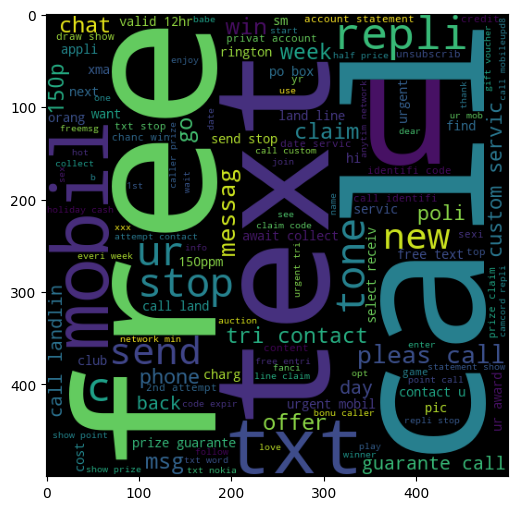

In [145]:
plt.figure(figsize=(15,6))
plt.imshow(spam_text)

In [146]:
ham_text = wc.generate(df[df['classification']==0]['transformed_text'].str.cat(sep=" "))

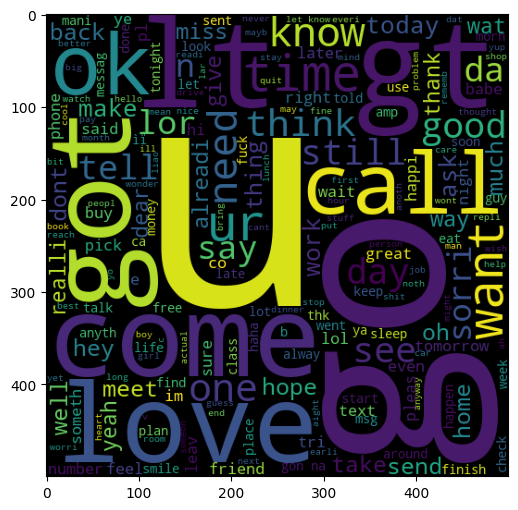

In [147]:
plt.figure(figsize=(15,6))
plt.imshow(ham_text)

In [148]:
df.head()

,classification,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
spam_corpus= []
for msg in df[df['classification']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [154]:
import collections
most_common_words = pd.DataFrame(collections.Counter(spam_corpus).most_common(30))

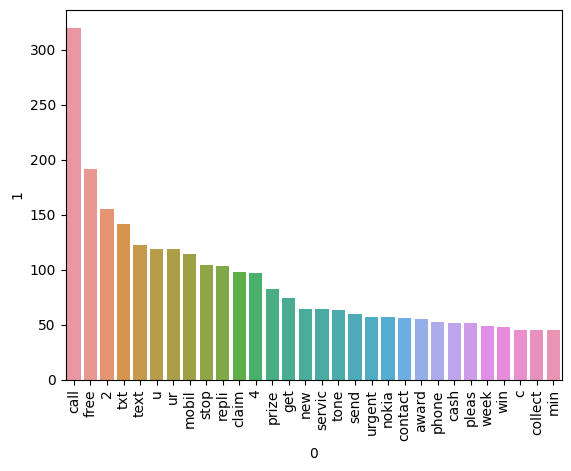

In [166]:
sns.barplot(x=most_common_words[0], y=most_common_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [167]:
ham_corpus= []
for msg in df[df['classification']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

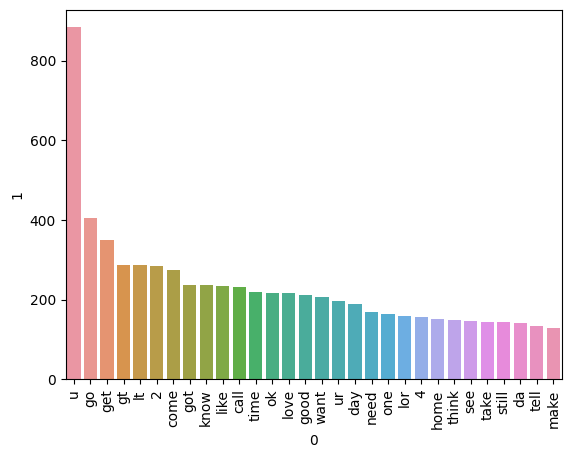

In [168]:
ham_words = pd.DataFrame(collections.Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_words[0], y=ham_words[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [203]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [170]:
X = cv.fit_transform(df['transformed_text']).toarray() 

In [176]:
X.shape
# 5169 rows for each text, and there are total 6708 differnt words across all text
# the vectorizer has an array where the index represents each word, and the number in each index is the frequncy of the word

(5169, 6708)

In [178]:
y = df['classification'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [179]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# 20% are test data, and 80% train 
# random_state=2 , keeps the same split of data each time

In [189]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [190]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [192]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [193]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [194]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [204]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray() 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2,random_state=2)

In [205]:
gnb.fit(X1_train, y1_train)
y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [206]:
mnb.fit(X1_train, y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [207]:
bnb.fit(X1_train, y1_train)
y1_pred3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# Tfidf with MNB produces best result because of precision being so high
# accuracy isn't as important as precision here since there's a data inbalance

In [209]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))